<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [54]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import numpy as np
import statsmodels

from ipywidgets import interact
from IPython.display import display, Markdown, Latex

from matplotlib import pyplot as plt

In [55]:
data_path = Path.cwd().parent / 'data'

In [56]:
df = pd.read_pickle(data_path / "aita-qa-train.pkl")

In [57]:
df.label.value_counts()

NTA    6024
YTA    3524
NAH     700
ESH     340
Name: label, dtype: int64

In [58]:
df['title_lower'] = df.title.map(lambda x: x.lower())

In [61]:
pd.set_option('display.max_colwidth', 400)

@interact
def filter_by_keyword(filter_words=""):
    plot_df = df
    filter_words = [a.strip() for a in filter_words.split(',')]
    if len(filter_words) > 0:
        plot_df = df[df.title_lower.map(lambda x: any([word in x for word in filter_words]))]
    display(Markdown(f"__Total number found: {len(plot_df)}/{len(df)}__"))
    display(plot_df.head(10)[['title']])

interactive(children=(Text(value='', description='filter_words'), Output()), _dom_classes=('widget-interact',)…

In [40]:
@interact
def view_fine(idx=(0, len(df), 1)):
    row = df.iloc[idx]
    display(Markdown(f"__{row.title}__"))
    
    display(Markdown(f"*{row.label}*"))
    
    
    display(Markdown(row.selftext))
    
    display(Markdown("__ARGUMENTS FOR NTA__"))
    for argument in row.nta_list:
        display(Markdown(argument))
        
    display(Markdown("__ARGUMENTS FOR YTA__"))
    for argument in row.yta_list:
        display(Markdown(argument))

interactive(children=(IntSlider(value=5294, description='idx', max=10588), Output()), _dom_classes=('widget-in…

In [50]:
df['len_title'] = df.title.map(lambda x: len(x.split()))

NameError: name 'plt' is not defined

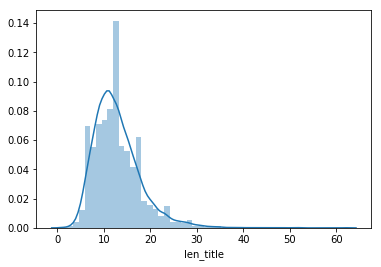

In [52]:
sns.distplot(df.len_title)
plt.show()